# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

N_PONTOS_TOTAL = 1000

# Criando a reta
n1, n2 = np.random.uniform(-1, 1, 2)
p1 = [n1, n2]

n1, n2 = np.random.uniform(-1, 1, 2)
p2 = [n1, n2]

# Coeficiente angular (m = (y2 -y1) / (x2 - x1))
m = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Coeficiente linear (b = y - mx)
b = p1[1] - m*p1[0]

data = [] # dataset
y = []
for i in range(N_PONTOS_TOTAL):
    n1, n2 = np.random.uniform(-1, 1, 2)
    x = [n1, n2]
    data.append(x)
    
    # Funcao alvo
    f_x = m * n1 + b 
    
    # Mapeia os pontos de acordo com a reta
    if ( (aux := np.sign(m*n1 - n2 + b)) != 0):    
        y.append(aux) # Equacao geral da reta

### Visualizando o dataset

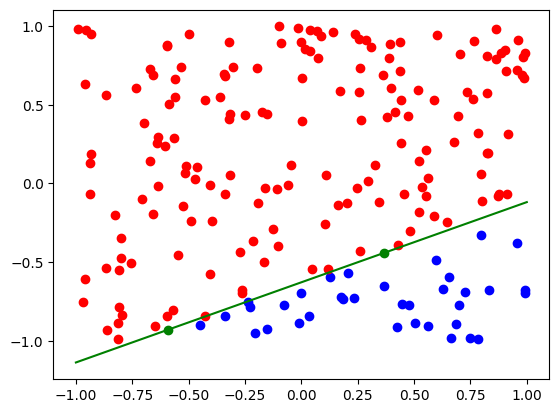

In [2]:
line = np.linspace(-1, 1, 1000) 
plt.plot(line, m*line + b, label="f(x)", c="green")

# Pontos usados na criacao da reta
plt.scatter(p1[0], p1[1], c='green')
plt.scatter(p2[0], p2[1], c='green')

for i in range(len(data[:200])):
    if (y[i] == 1):
        plt.scatter(data[i][0], data[i][1], c='blue')
    else:        
        plt.scatter(data[i][0], data[i][1], c='red')

plt.show()    

### Algoritmo PLA

In [3]:
def PLA (X):
  def get_w(self):
    return self.w
    
  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    hasWrongClassifiedPoint = True
    bestError = len(y)
    self.w = np.zeros(len(X[0]))
    bestW = self.w
    for iter in range(1000):
           
      #Testa se sign(wTXn) != Yn - ponto classificado errado
        for i in range(len(y)):
          if(np.sign(np.dot(self.w, X[i])) != y[i]):
            self.w = self.w + (y[i]*X[i])
            eIN = self.errorIN(X, y)
            if(bestError > eIN):
              bestError = eIN
              bestW = self.w
    self.w = bestW
                    
  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]
    
  def h(self, x):
    return np.sign(np.dot(self.w, x))
    
  def errorIN(self, X, y):
    error = 0
    for i in range(len(y)):
      if(np.sign(np.dot(self.w, X[i])) != y[i]):
        error += 1
                
    return error

### Função para visualização dos passos do PLA

In [5]:
%matplotlib inline
#F é umas lista com os elemento m e b que são os elementos da função alvo
def plotGrafico(data, w, y, f):
  nPontos = len(data)    
  #matplotlib.use('TkAgg')    
            
  ax = plt.gca()
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  plt.axis([-1, 1, -1, 1])

  x_plt = [data[i][0] for i in range(nPontos)]
  y_plt = [data[i][1] for i in range(nPontos)]

  for i in range(nPontos):
    if (y[i] == 1):
      plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
    else:
      plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

  x = np.linspace(-1, 1, 1000)
  plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
  plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
  clear_output(wait=True)    
  plt.show(block=False)    
  plt.pause(0.01)   


### Função para construir lista de pontos classificados incorretamente

In [6]:
def classificaIn(X,Y,w):
  lista = []
  for i,x in enumerate(X):
    x = conlistaPCI(x, w)
    if y != Y[i]:
      lista.append(x)
  return lista

### Calculando a acurácia

In [7]:
def acuracia(X,Y,w):
  corretos = 0
  for i, x in enumerate(X):
    y = conlistaPCI(X,w)
    if y == Y[i]:
      corretos += 1
    return corretos/len(Y)


In [15]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carrega o conjunto de dados Iris
iris = load_iris()

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

# Cria um objeto Perceptron
perceptron = Perceptron()

# Treina o modelo com os dados de treinamento
perceptron.fit(X_train, y_train)

# Faz as previsões para os dados de teste
y_pred = perceptron.predict(X_test)

# Calcula a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia do Perceptron:", accuracy)


Acurácia do Perceptron: 0.9166666666666666
